# Digits ✍️

> For this exercise, we will work on the digits dataset and try to classify the data using our new clustering algorithms!

In [1]:
# TODO : imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

### Q1. Load the dataset, rescale it and use PCA(32) then tSNE(2) to obtain sharp results.

In [2]:
# TODO : load dataset (limit to 500 entries)
X,y = load_digits(return_X_y=True)[:500]

In [6]:
# TODO: Rescaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [7]:
# TODO : Apply dimension reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [8]:
pca = PCA(n_components=32)
X_pca = pca.fit_transform(X_sc)

In [9]:
tsne = TSNE(n_components=2)
X_final = tsne.fit_transform(X_pca)

In [10]:
X_final

array([[-69.28414   , -14.473279  ],
       [ 13.830451  ,  18.424095  ],
       [ -8.19236   ,   5.002663  ],
       ...,
       [  1.8731613 ,   5.977364  ],
       [  0.47893134, -32.461784  ],
       [ -2.433683  ,  -3.8088164 ]], dtype=float32)

### Q2. Plot the data points

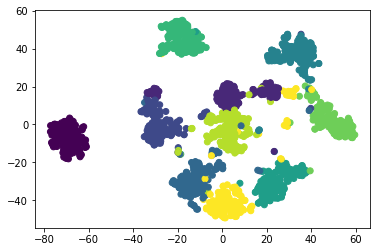

In [16]:
# TODO : plot data points
plt.figure()

plt.scatter(X_final[:,0], X_final[:,1], c=y)

plt.show()

### Q3. Use AgglomerativeClustering to cluster the data 

In [18]:
# TODO : generate dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

In [19]:
linked = linkage(X_final, method='single')

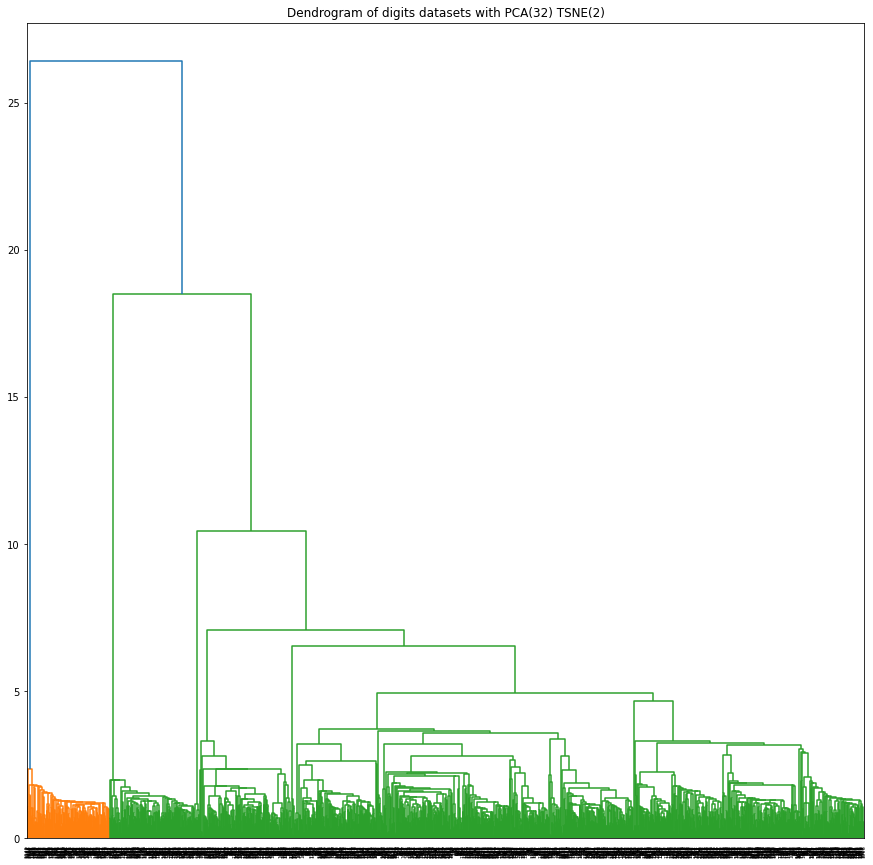

In [21]:
plt.figure(figsize=(15,15))

dendrogram(linked)

plt.title('Dendrogram of digits dataset with PCA(32) TSNE(2)')

plt.show()

In [23]:
# TODO : apply sklearn AgglomerativeClustering algorithm on processed data
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10)
ac.fit(X_final)

AgglomerativeClustering(n_clusters=10)

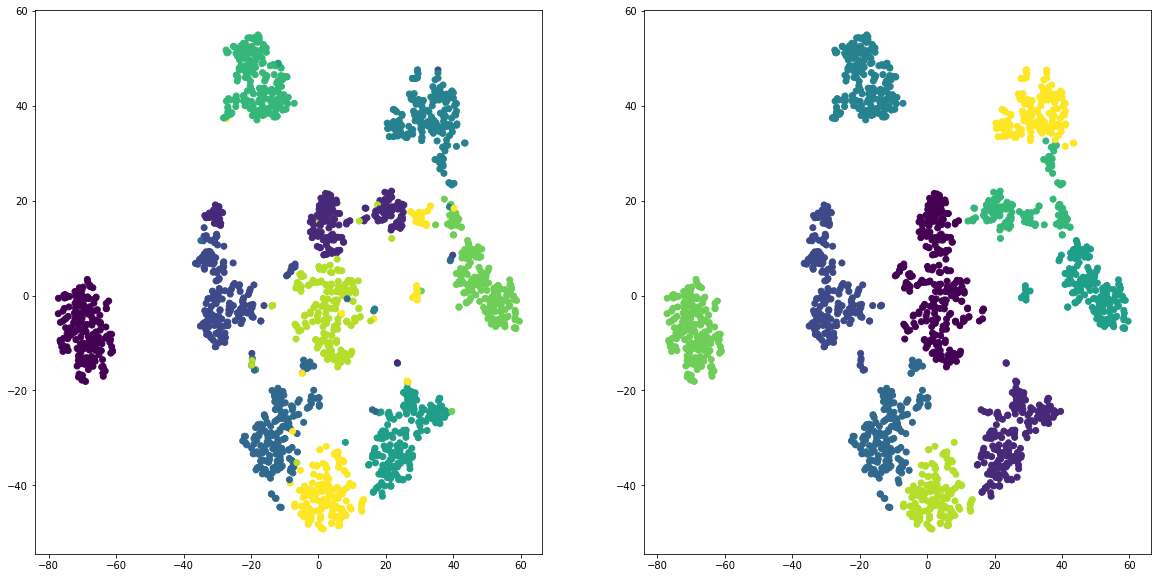

In [27]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.scatter(X_final[:,0], X_final[:,1], c=y)

plt.subplot(122)
plt.scatter(X_final[:,0], X_final[:,1], c=ac.labels_)

plt.show()

### Q4. Evaluate the classification model

Do the labels of the clusters correspond to the labels of the digits?<br> How can we match them? 

In [38]:
ac.fit_predict(X_final)

array([7, 6, 0, ..., 0, 8, 0])

In [43]:
# TODO : affect label to cluster
import statistics as stat
y_pred = [stat.mode(y[np.where(ac.labels_==ac.labels_[i])]) for i in range(X_final.shape[0])]

In [9]:
# TODO : compute score

In [51]:
score = (y - y_pred == 0).mean()

In [53]:
print(f'Score : {score:.2%}')

Score : 86.53%
